In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [ ]:
# Only get data analyst jobs in the USA
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

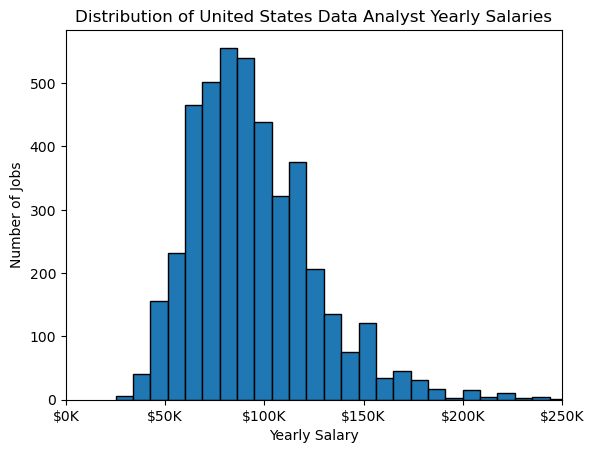

In [ ]:
df_DA_US['salary_year_avg'].plot(kind='hist', bins=40, edgecolor='black')
plt.xlim(0, 250000)

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

plt.xlabel('Yearly Salary ($USD)')
plt.ylabel('Number of Jobs')
plt.title('Distribution of United States Data Analyst Yearly Salaries')
plt.show()

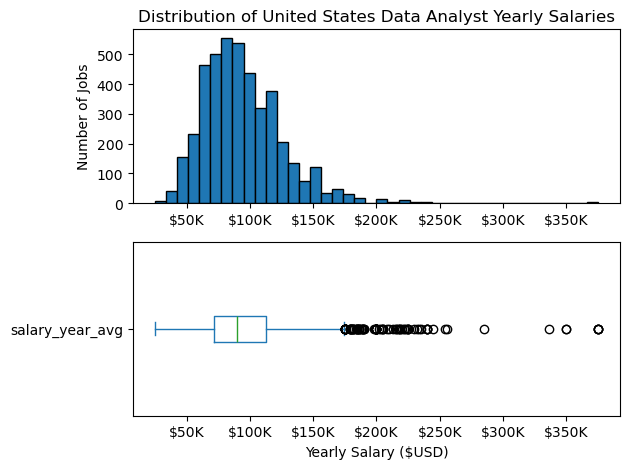

In [ ]:
fig, ax = plt.subplots(2, 1)

df_DA_US['salary_year_avg'].plot(kind='hist', bins=40, edgecolor='black', ax=ax[0], trendline)
ax[0].set_xlabel('')
ax[0].set_ylabel('Number of Jobs')
ax[0].set_title('Distribution of United States Data Analyst Yearly Salaries')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))


df_DA_US['salary_year_avg'].plot(kind='box', vert=False, ax=ax[1])
ax[1].set_xlabel('Yearly Salary ($USD)')
ax[1].set_ylabel('')
ax[1].set_title('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

fig.tight_layout()
plt.show()